'최단 경로 문제'는 각 간선의 가중치 합이 최소가 되는 두 정점(또는 노드) 사이의 경로를 찾는 문제다

In [1]:
## 최단 경로는 지도 상의 한 지점에서 다른 지점으로 갈 때,
## 가장 빠른 길을 찾는 것과 비슷하다.

## 정점(Vertex)은 교차로에 해당하고, 간선(Edge)는 도로에 해당한다.
## 가중치(Weight)는 거리나 시간과 같은 이동 비용에 해당한다.

## 이처럼 직관적인 문제는 단 하나의 Optimal Solution이 있을 거라 생각하기 쉽다
## 하지만 실제로는 그래프의 종류와 특성에 따라 각각 최적화된 다양한 '최단 경로 알고리즘'이 존재한다.
## 이 중에서 가장 유명한 것은 다익스트라(Dijkstra) 알고리즘일 것이다.

In [2]:
## 다익스트라 알고리즘은 항상 노드 주변의 최단 경로만을 택하는 대표적인 '그리디(Greedy) 알고리즘' 중 하나로
## 단순할 뿐만 아니라 실행 속도 또한 빠르다.
## 다익스트라 알고리즘은 노드 주변을 탐색할 때 BFS를 이용하는 대표적인 알고리즘이기도 하다.

## 다익스트라의 최초 구현에서는 시간 복잡도가 O(V^2)이었으나
## 현재는 BFS시 가장 가까운 순서를 찾을 때 우선순위 큐를 적용하면 O((V+E)logV)이고,
## 모든 정점이 출발지에서 도달 가능하다면 O(ElogV)가 된다.

# 40. 네트워크 딜레이 타임

### LeetCode 743. Network Delay Time

- K부터 출발해 모든 노드가 신호를 받을 수 있는 시간을 계산하라.<br/>
- 불가능할 경우 -1을 리턴한다.<br/>
- 입력값(u, v, w)는 각각 출발지, 도착지, 소요 시간으로 구성되며, 전체 노드의 개수는 N으로 입력받는다.

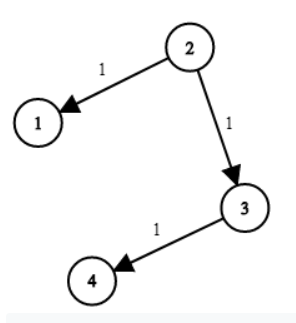

In [3]:
from IPython.display import Image

Image("example.jpg", width="200", height="300")

In [4]:
## 예제1
    ## input: times = [[2, 1, 1], [2, 3, 1], [3, 4, 1]], N = 4, K = 2
    ## output: 2

##### 풀이 1 다익스트라 알고리즘 구현

In [5]:
## 이 문제에서는 2가지 사항을 판별해야 한다.
    
    ## 1. 모든 노드가 신호를 받는 데 걸리는 시간
    ## 2. 모든 노드에 도달할 수 있는지 여부
    
## 다익스트라 알고리즘을 구현하면 출발지로부터 다른 모든 노드로 가는 최단 거리와 도달 할 수 있는지 여부를 함께 알 수 있다. 

In [6]:
## 다익스트라 알고리즘을 좀 더 효율적으로 구현하기 위해 1950년대에 처음 구현한 방식과 달리, 
## '우선순위 큐'를 적용하는 방식을 사용한다.
## 여기서는 구체적으로 최소 힙(Min Heap)으로 우선순위 큐를 구현한 heapq 모듈을 사용하는 형태로 구현한다.

In [7]:
import collections
import heapq
from typing import *

def networkDelayTime(times: List[List[int]], N: int, K: int) -> int:
    graph = collections.defaultdict(list)
    
    # 그래프 인접 리스트 구성
    for u, v, w in times:
        graph[u].append((v, w))
        
    # 큐 변수: [(시작 정점K 에서 도착 정점 까지의 소요 시간, 도착 정점)]
    Q = [(0, K)]
    dist = collections.defaultdict(int)
    
    # 우선순위 큐 최솟값 기준으로 정점까지 최단 경로 삽입
    while Q:
        time, node = heapq.heappop(Q)
        if node not in dist:
            dist[node] = time
            for v, w in graph[node]:
                alt = time + w
                heapq.heappush(Q, (alt, v))
    
    # 모든 노드의 최단 경로 존재 여부 판별
    if len(dist) == N:
        return max(dist.values())
    
    return -1

In [8]:
## 이 문제의 예제 입력값은 너무 단순하기 때문에 좀 더 복잡한 입력값으로 테스트해보자

## [[3, 1, 5], [3, 2, 2], [2, 1, 2], [3, 4, 1], [4, 5, 1], [5, 6, 1], [6, 7, 1], [7, 8, 1], [8, 1, 1]]
## N = 8, K = 3

## 구현한 파이썬 코드를 이용해 진행한 과정은 그림 13-1에서 볼 수 있다.

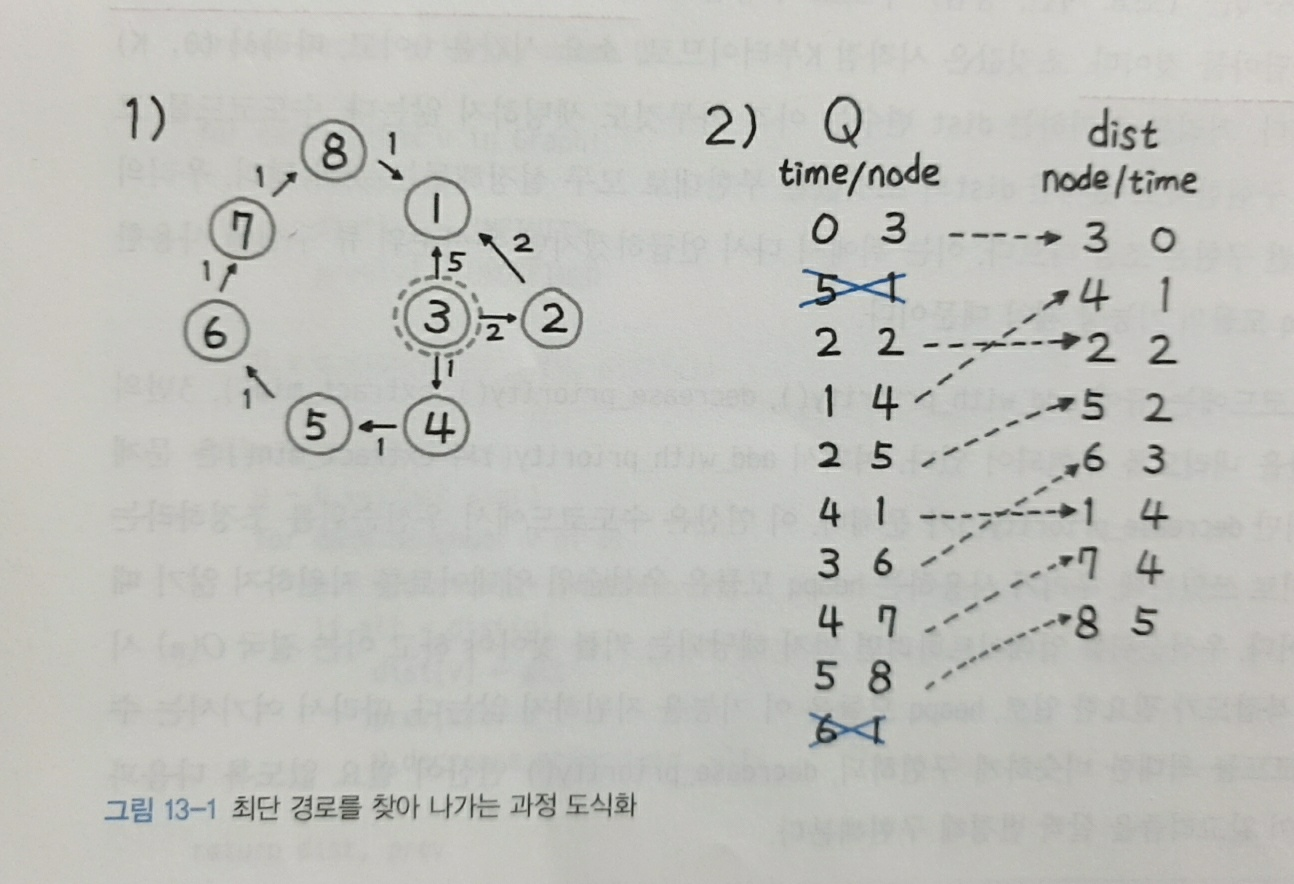

In [9]:
from IPython.display import Image

Image('그림13-1.jpg', width="500")

In [10]:
## 13-1의 1)은 입력값을 그래프로 표현한 것이다.
## 2)의 Q와 dist는 위에서부터 차례로, 변수에 삽입되는 순서대로 값을 나열했다.
## 여기서 Q는 우선순위 큐이므로 값이 계속 쌓이다가 낮은 값부터 하나씩 추출되면서(최소 힙) 제거된다.
## dist에 존재하지 않는다면 바로 dist 값으로 time과 node의 순서가 바뀌면서 입력되고,
## 이미 dist에 키가 존재하면 그 값은 버리게 된다. 
## dist에는 항상 최솟값부터 셋팅되기 때문에 이미 값이 존재한다면 그 값은 이미 최단 경로이기 때문이다.
## 2)에서 [5, 1], [6, 1] 두 값이 버려지게 된다.

## 실제로 노드 1은 3 -> 2 -> 1 순서로 방문하면 소요 시간 4에 도달할 수 있으며,
## 이후에 삽입 되려고 하는 소요시간 5와 6은 모두 이보다 오래 걸리는 경로다.

## 마지막으로 모든 노드에 도달할 수 있는지 여부를 dist 키의 개수와 N을 비교해 판별한다.
## 전체 노드 개수만큼이 모두 dist에 있다면 모든 노드의 최단 경로를 구했다는 의미고,
## 이는 모두 시작점에서 도달 가능하다는 의미이기도 하다.
## 만약 노드 개수가 하나라도 모자라면 -1을 리턴한다.

# 41. K 경유지 내 가장 저렴한 항공권

### LeetCode 787. Cheapest Flights Within K Stops

- 시작점에서 도착점까지의 가장 저렴한 가격을 계산하되, K개의 경유지 이내에 도착하는 가격을 리턴하라.
- 경로가 존재하지 않을 경우 -1을 리턴한다.

In [11]:
## 예제1
    ## input: n = 3, edges = [[0, 1, 100], [1, 2, 100], [0, 2, 500]], src = 0, dst = 2, K = 0
    ## output: 500
    
    ## 설명 : 시작점 src 노드 0에서 도착점 dst 노드 2까지 최저가는 0->1->2 경로인 200이지만,
    ##        K = 0이기 때문에 경유지가 하나도 없어야 하므로 이 조건을 만족하는 최저가는 0->2인 500이다.

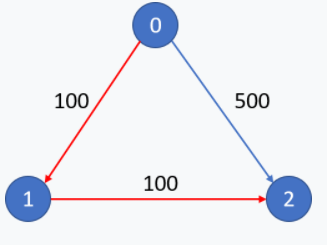

In [12]:
from IPython.display import Image

Image('problem_41_input_example.jpg', width="300")

##### 풀이 1 다익스트라 알고리즘 응용

In [13]:
## 이 문제 또한 다익스트라 알고리즘을 응용한 풀이를 연습할 수 있는 좋은 문제다.
## 가격을 시간이라고 가정한다면 최단 시간을 계산하는 경로는 앞서 다익스트라 알고리즘으로 동일하게 구현할 수 있다.
## 다만, 한 가지 제약사항이 추가되었는데 K개의 경유지 이내에 도착해야 한다는 점이다.
## 따라서 구현을 위해 우선순위 큐에 추가할 때 K 이내일 때만 경로를 추가하면 될 것 같다.

In [14]:
## 이전 문제의 코드에서 살짝 변형되었다.
## 변수명은 이전 문제에서는 시간을 구하므로 time 이었다면 이 문제에서는 최저가를 계산해야 하므로 price가 된다.
## 더 이상 전체 거리를 보관할 필요가 없기 때문에, dist 딕셔너리는 삭제했다. 도착점까지의 최단 경로만 계산하면 된다.
## 그리고 전체 경로의 개수도 체크할 필요가 없기 때문에 여기서는 모두 삭제했다.

## 우선순위 큐에 입력값의 최대 경유지 값인 K를 추가하고 경유지가 하나씩 늘때마다 -1을 한다.

In [15]:
def findCheapestPrice(n: int, flights: List[List[int]], src: int, dst: int, K: int) -> int:
    graph = collections.defaultdict(list)
    
    # 그래프 인접 리스트 구성
    for u, v, w in flights:
        graph[u].append((v, w))
    
    # 큐 변수: [(가격, 정점, 남은 가능 경유지 수)]
    Q = [(0, src, K)]
    
    # 우선순위 큐 최솟값 기준으로 도착점까지 최소 비용 판별
    while Q:
        price, node, k = heapq.heappop(Q)
        if node == dst:
            return price
        if k >= 0:
            for v, w in graph[node]:
                alt = price + w
                heapq.heappush(Q, (alt, v, k - 1))
                
    return -1
                